In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize': (18, 12)})
# np.random.seed(0)

In [3]:
iris = pd.read_csv('test/iris/train_iris.csv')

In [4]:
X_train = iris.drop(['Unnamed: 0', 'species'], axis=1)
y_train = iris.species

In [5]:
iris_tst = pd.read_csv('test/iris/test_iris.csv')

In [6]:
X_tst = iris_tst.drop(['Unnamed: 0', 'species'], axis=1)
y_tst = iris_tst.species

In [7]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_tst, y_tst)
    scores_data = scores_data.append({'max_depth': max_depth,
                                      'train_score': train_score,
                                      'test_score': test_score}, ignore_index=True)


In [8]:
scores_data_long = pd.melt(scores_data, id_vars='max_depth',
                           value_vars=['train_score', 'test_score'],
                           var_name='set_type', value_name='score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

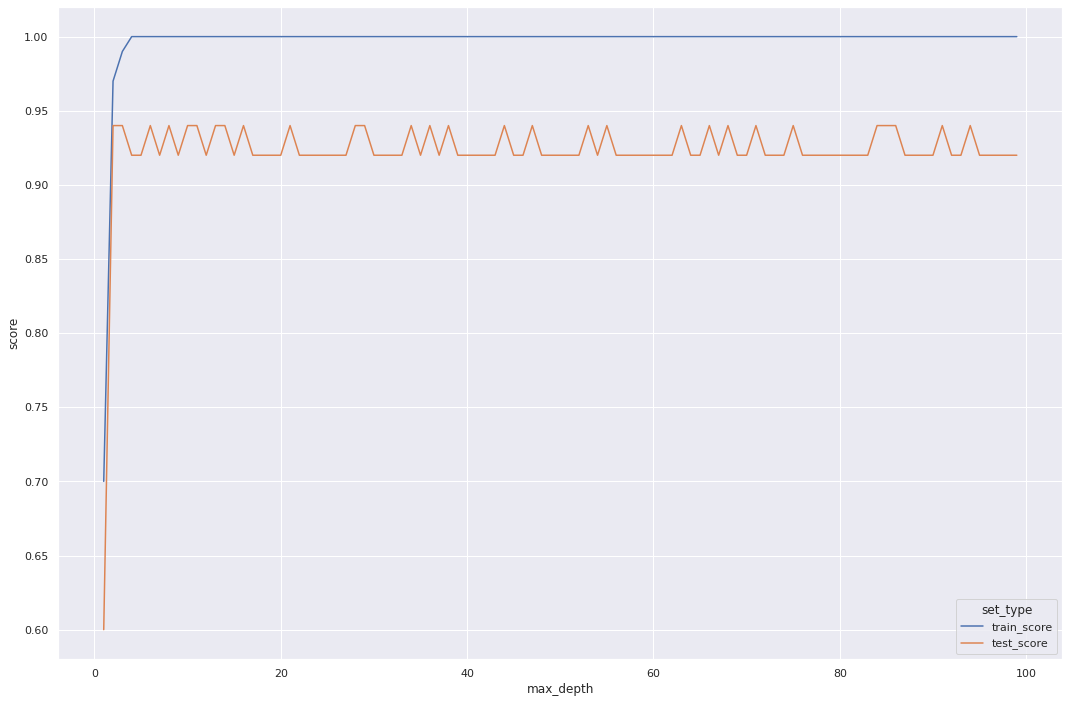

In [9]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)